<head>
    <title>
        Essay for Python team project
    </title>
</head>

<h1>Final Team Project for Python</h1>
<br><br>
<em>Cohort 2</em>
<br>
<em>by Tom Kembukuswa, Victoria Padua, Mauriac Djofang, and Iris, Wai Hoi Li</em>
<hr style = height:1.5px; color:black ; background-color:black/>

<h2>Introduction</h2>
<hr style = height:1.5px; color:black ; background-color:black/>
<body>
<p>The Middle East is generally speaking an arid region in Southwest Asia and part of North Africa stretching from the Mediterranean Sea to the Persian Gulf, bounded by the Black and Caspian Seas in the north and the Sahara Desert and the Indian Ocean in the south. The Middle East is a region composed of Qatar, UAE, and Saudi. Due to its religious, economic, and geographical location, the middle east is the home of three main religions ISLAM, Christianity & Judaism. With the impact of religion being very significant in this region, most of the culture is shaped by religions, which has also contributed to the acceptance of other cultures and religions.</p>
<p>This region is usually considered a multicultural and cosmopolitan place where different types of people have the chance to connect and do business. The most spoken language in the region is Arabic, and due to its location, people consider this region has the crossroads of the world because it connects Africa, Asia, and Europe.</p>
<p>The region owns more than half of the oil and gas reserves on the planet which has contributed to its growth over the years. Even though these resources are not equally distributed there are still considered the world's leading oil producers.</p>
<p>As much as the Middle East is blessed with a rich culture and resources, it has been at the center of many important world issues. Some of the countries within the region still go through political instability.</p>
<p>Though our region is the Middle East we noticed that Russia was included in the data. Even though currently Russia is not part of the Middle East we noticed that, Russia has huge influence over Middle East, and the region and country share political, business, and friendly relationships. In other words, it won’t be wrong to include them in the Middle East.</p>
<p>It is important to keep in mind that Russia is not currently part of the Middle East, however, for the purpose of our assignment we have decided to consider Russia as part of the Middle East. The reason why we decided to consider Russia is the geographical location and the power of the country. Russia is the world's biggest country and one of the most powerful ones, they have the second most powerful military, and their nominal GDP is ranked at the eleven spots.</p>
<h2>Method on choosing the representing country</h2>
<hr style = height:1.5px; color:black ; background-color:black/>
<h3>Step 1 - Data type investigation</h3>
<p>Our team first started by investigating if the data type for the data set is correct or not based on the stored valued within the column.</p>
</body>

In [67]:
#Importing Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Assigning dataset path to file
file = "./Final_Project_Dataset.xlsx"

#Importing dataset
data = pd.read_excel(io = file,
            sheet_name = "Data",
            header = 0)

In [ ]:
#Exploring raw dataset
data.head(10)

In [ ]:
#World stats overview
data.describe(include= 'number')

In [ ]:
#Evaluating data type
data.info()

<h3>Step 2 - Obscure findings</h3>
<p>

- We noticed that the population census for certain countries was prior to 2010 which does reflect the current reality. So it was appropriate for us to choose countries with population census reflect post-2010.

- Though our region is the Middle East we noticed that Russia was included in the data. Even though currently Russia is not part of the Middle East we noticed that, the region and country share political, business, and friendly relationships. In other words, it won’t be wrong to include them in the Middle East.

</p>

<body>
    <h3>Step 3 - Missing Value</h3>
    <p>Then we moved on to find missing numbers in all criteria, and flagged it based on the criteria. After that, we determined should we use the mean or the median to replace the missing values under each criteria, according to the histogram.</p>
</body>

In [68]:
#Subsetting dataset to only Middle East & Russia Region
countries_under_middle_east_n_russia = data.loc[ : , : ][data.loc[ : , "Hult Region"] == "Middle East & Russia"]

#Values count in Middle East & Russia Region
count_countries_under_middle_east_n_russia = countries_under_middle_east_n_russia.count()
print(count_countries_under_middle_east_n_russia)

Country Code Total                                                           14
Country Name                                                                 14
Hult Region                                                                  14
Cool Name                                                                    14
AIDS estimated deaths (UNAIDS estimates)                                     11
Adjusted net enrollment rate, primary (% of primary school age children)      9
Adolescent fertility rate (births per 1,000 women ages 15-19)                14
Antiretroviral therapy coverage (% of people living with HIV)                12
Births attended by skilled health staff (% of total)                         12
CO2 emissions (metric tons per capita)                                       14
Contributing family workers, female (% of female employment)                 14
Contributing family workers, male (% of male employment)                     14
Contributing family workers, total (% of

In [ ]:
# Exploring missing values in raw data 
data.isnull().any()

# Exploring missing values in Middle East & Russia Region per column
mn_middle_east_n_russia_conutries =  countries_under_middle_east_n_russia.isnull().sum()

# Exploring missing values in Middle East & Russia Region per column conutries
countries_under_middle_east_n_russia.isnull().sum().sum()

In [69]:
# Creating a copy of the original dataset
new_data = pd.DataFrame.copy(data)

# Excluding object type columns
new_data_column = new_data.columns[4:]

# Subsetting dataset to only Middle East & Russia Region in the dataset copy
country_name = new_data.iloc[:,1][new_data.iloc[:,2]=="Middle East & Russia"]
new_countries_under_middle_east_n_russia = new_data.loc[ : , : ][new_data.loc[ : , "Hult Region"] == "Middle East & Russia"]

# Calculating world mean for each feature        
new_world_mean = new_data.mean(axis = 0).round(decimals = 2)

# Calculating Middle East & Russia  mean for each feature 
mean_middle_east_n_russia = new_countries_under_middle_east_n_russia.mean(axis = 0).round(decimals = 2)    

# Calculating world median for each feature       
new_world_median = new_data.median(axis = 0).round(decimals = 2)

# Calculating Middle East & Russia  mean for each feature 
median_middle_east_n_russia = new_countries_under_middle_east_n_russia.median(axis = 0).round(decimals = 2) 


print(country_name)

1             Afghanistan
7                 Armenia
12             Azerbaijan
18               Bulgaria
22                Belarus
68                Georgia
90     Iran, Islamic Rep.
121               Moldova
149              Pakistan
163               Romania
164    Russian Federation
191          Turkmenistan
200               Ukraine
203            Uzbekistan
Name: Country Name, dtype: object


In [ ]:
# Automatically flagging missing values with a for loop
for criteria in new_data:
    if new_data[criteria].isnull().astype(int).sum() > 0:
        new_data['m_'+criteria] = new_data[criteria].isnull().astype(int)

#Printing missing values counts and missing value flags 

print(f"""
Original Missing Value Counts:
------------------------------
{data.isnull().sum(axis = 0)}


Sums of Missing Value Flags
--------------------------
{new_data.iloc[ : , -40: ].sum(axis = 0)}

""")



/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


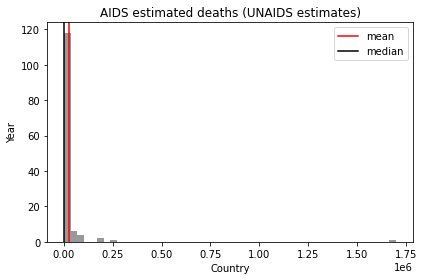

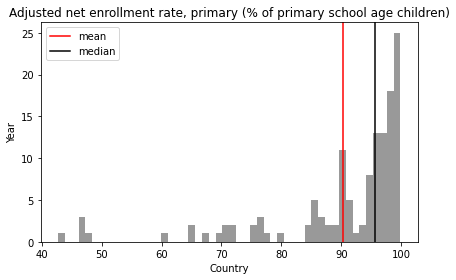

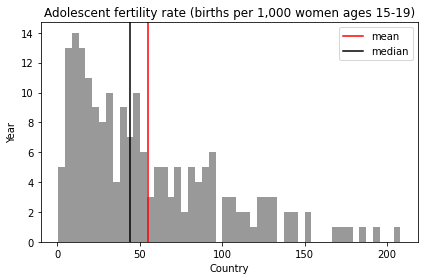

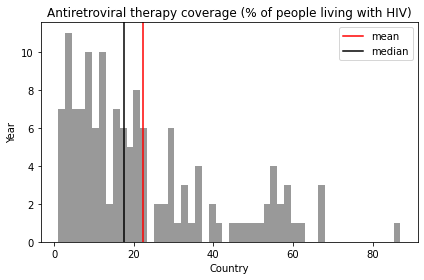

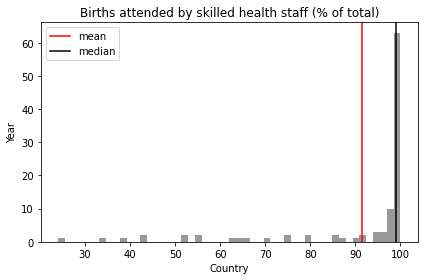

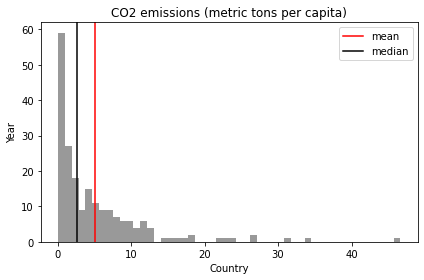

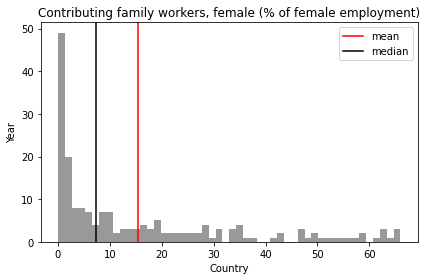

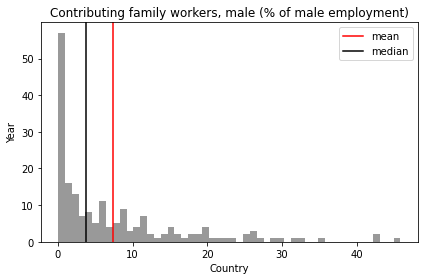

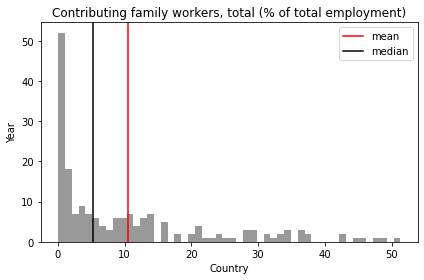

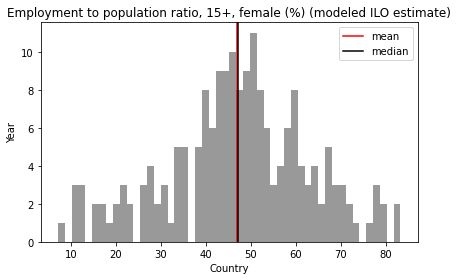

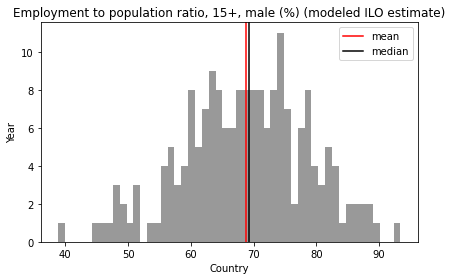

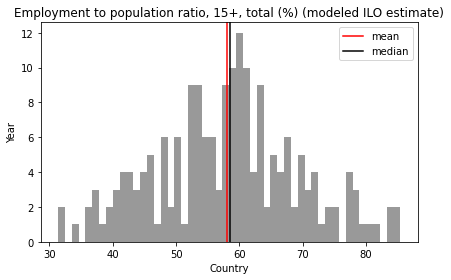

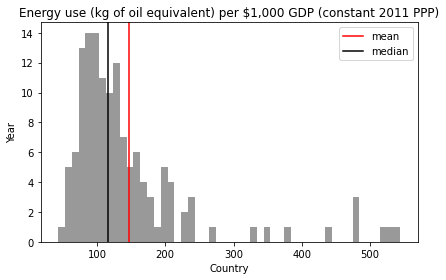

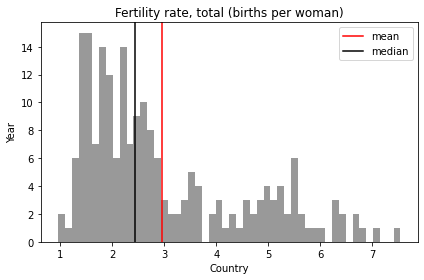

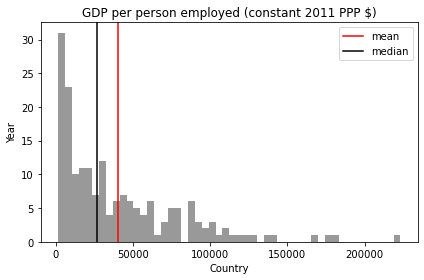

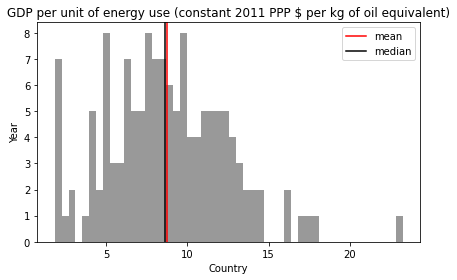

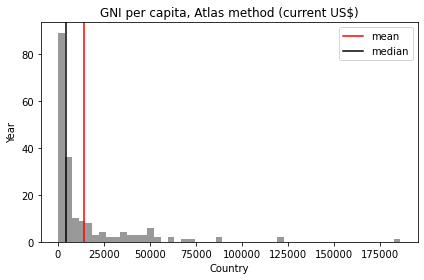

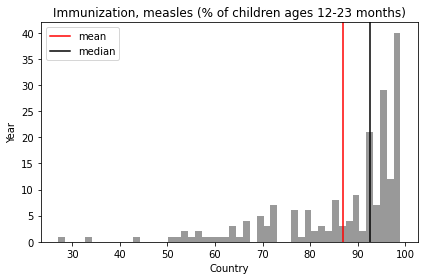

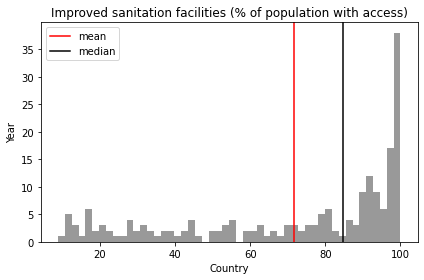

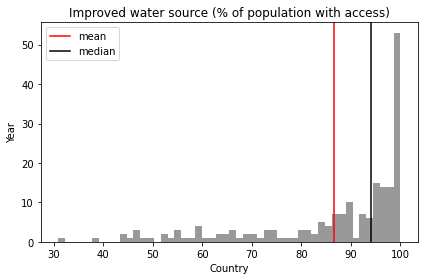

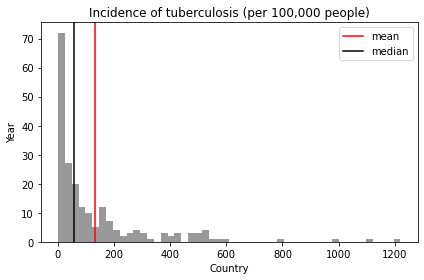

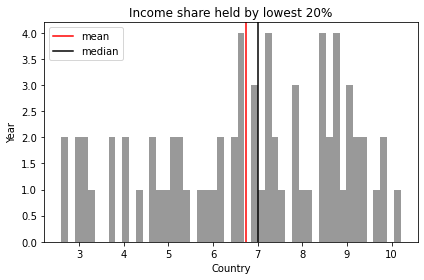

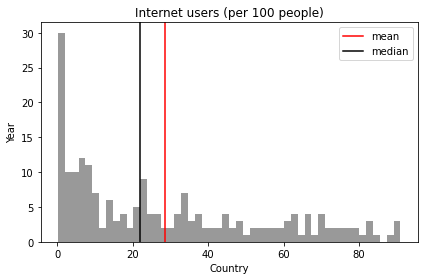

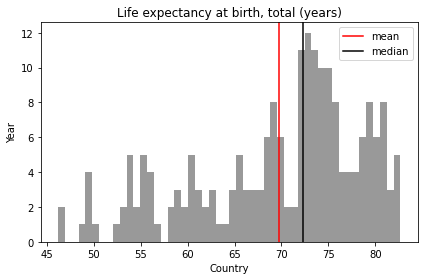

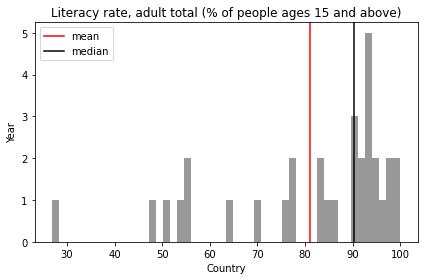

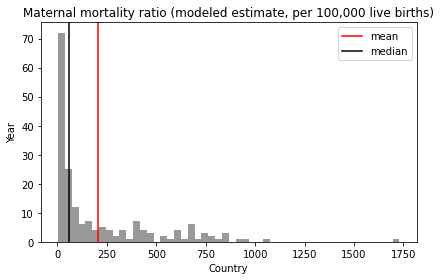

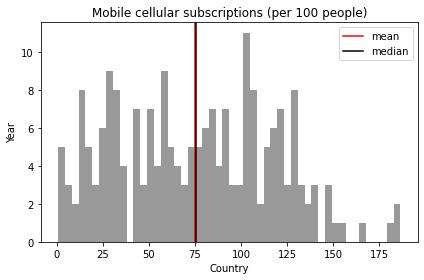

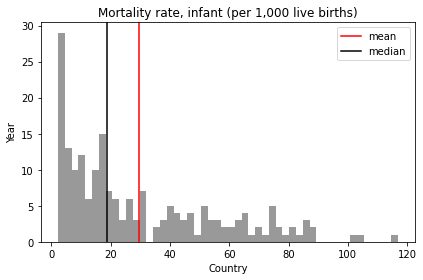

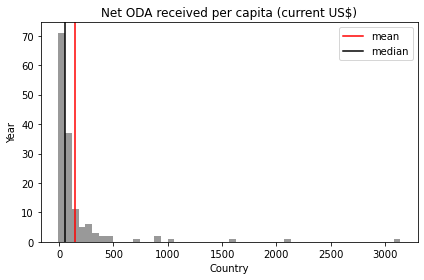

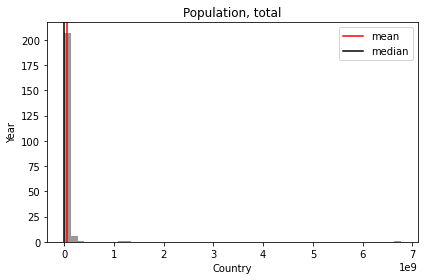

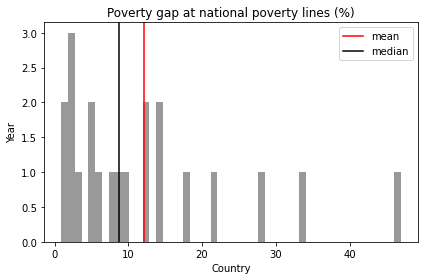

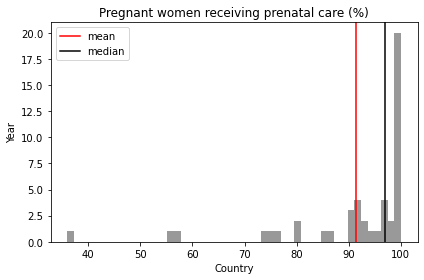

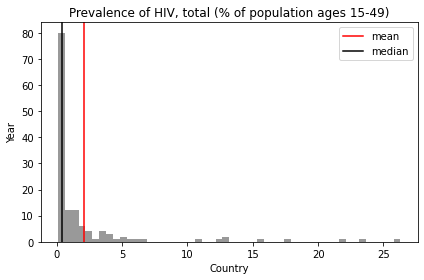

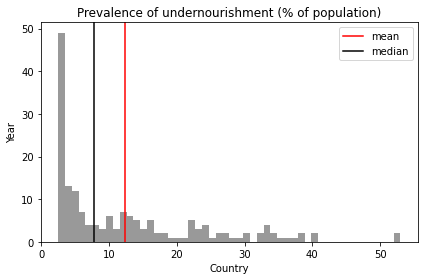

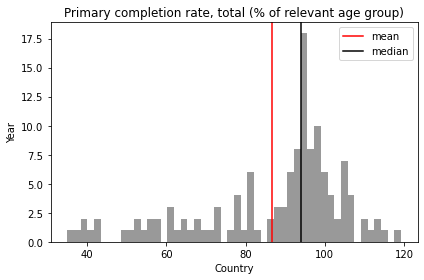

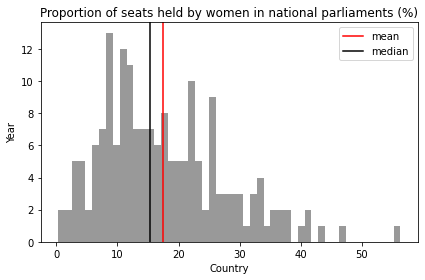

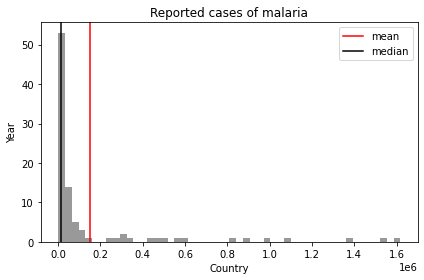

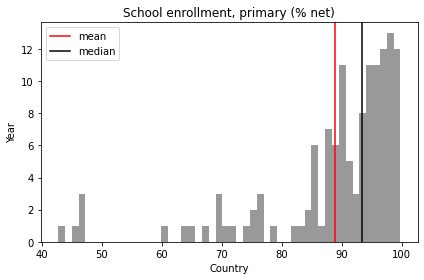

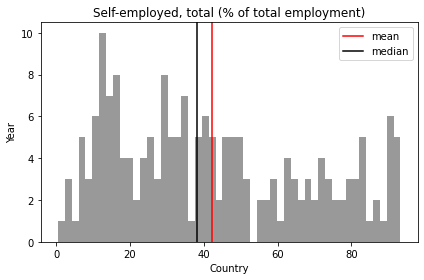

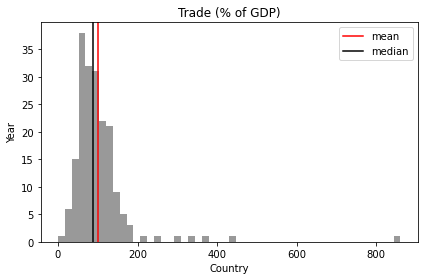

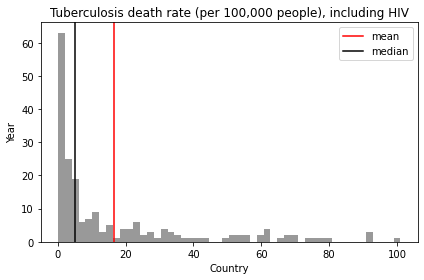

In [70]:
## Determining criteria to fill missing values mean or median ##

'''
Assumptions: 

If the distribution is skewed, missing values will be filled with the median.

If the distribution is bell-shaped, missing values will be filled with the mean.
'''

# create histogram to see data distribution 
for name in new_data_column:
    # the following code makes the new DataFrame independent
    df_dropped = pd.DataFrame.copy(new_data)
    # using dropna() for df_dropped - remove missing value
    df_dropped = df_dropped[name].dropna().round(2)
    # histogram  for mean or median of every column
    sns.distplot(a     = df_dropped,
                 bins  = 50,
                 hist  = True,
                 kde   = False,
                 rug   = False,
                 color = 'black')

    # this adds a title
    plt.title(label = name)


    # this adds an x-label
    plt.xlabel(xlabel = 'Country')


    # this add a y-label
    plt.ylabel(ylabel = 'Year')


    plt.axvline(x = new_data[name].mean(),color='red')
    plt.axvline(x = new_data[name].median(),color='black')

    plt.legend(labels = ['mean','median'])

    # compile and display the plot so that it is formatted as expected
    plt.tight_layout()
    plt.show()

In [71]:
# filling missing value with either mean or median

'''
Legend:

mean = mean
medi = median
'''

measure_of_center =['medi','medi','medi','medi','medi','medi','medi','medi','medi','mean',\
                    'mean','mean','medi','medi','medi','mean','medi','medi','medi','medi',\
                    'medi','mean','medi','medi','medi','medi','mean','medi','medi','medi',\
                    'medi','medi','medi','medi','medi','medi','medi','medi','mean','medi',\
                    'medi']

# Resetting run value
run = 0
for cirteria in new_data_column:
    # assigning mean from new_world_mean as 'mean'
    mean = new_world_mean[run]
    
    # assigning median from new_world_mean as 'median'
    median = new_world_median[run]
    
    # setting condition if the criteria is met
    if measure_of_center[run] == "mean":
        new_data[cirteria].fillna(value = mean, inplace = True)
    elif measure_of_center[run] == "medi":
        new_data[cirteria].fillna(value = median, inplace = True)
    else:
        pass 
    # adds up mean or median to the run value according to the loop  result
    run +=1
    
# printing number of missing values
print(new_data.isnull().any().sum())

0


In [72]:
#checking  NAs are filled in correctly
print(new_data.iloc[ : , :-40 ][data.loc[ : , "Hult Region"] == "Middle East & Russia"])

    Country Code Total        Country Name           Hult Region Cool Name  \
1                  AFG         Afghanistan  Middle East & Russia    Mirage   
7                  ARM             Armenia  Middle East & Russia    Mirage   
12                 AZE          Azerbaijan  Middle East & Russia    Mirage   
18                 BGR            Bulgaria  Middle East & Russia    Mirage   
22                 BLR             Belarus  Middle East & Russia    Mirage   
68                 GEO             Georgia  Middle East & Russia    Mirage   
90                 IRN  Iran, Islamic Rep.  Middle East & Russia    Mirage   
121                MDA             Moldova  Middle East & Russia    Mirage   
149                PAK            Pakistan  Middle East & Russia    Mirage   
163                ROU             Romania  Middle East & Russia    Mirage   
164                RUS  Russian Federation  Middle East & Russia    Mirage   
191                TKM        Turkmenistan  Middle East & Russia

<h3>Step 4 - Criteria index decisions</h3>
<p>In order to have data that make sense and reflect truly on how the region is going, we decided to determine should our region performing better than the world or not based on the definition of each criteria. By doing, so, we could actually come up with a list that is comparing our region with the world.</p>

In [73]:
# setting criteria to determine who perform better at each category: world or region (Middle East & russia)

'''
Legend:

low = lower
lar = larger
'''
region_decision =['low','lar','low','lar','lar','low','lar','lar','lar','lar',\
                  'lar','lar','lar','lar','lar','low','lar','lar','lar','lar',\
                  'low','lar','lar','lar','lar','low','lar','low','low','low',\
                  'low','lar','low','lar','lar','lar','low','lar','lar','lar',\
                  'low']

# This confirms imputation is correct
index_region = pd.DataFrame(region_decision,index=new_data_column)
index_region.columns = ['decision']
print(index_region)

# Creating empty lists to be used in the next for loop
region_decision_lst = []
region_decision_pre_lst = []
run = 0
# for loop - calculate if the world or region performs better based on criteria definition
for position in region_decision:
    diff = (new_world_median[run]- median_middle_east_n_russia[run])/median_middle_east_n_russia[run]
    diff_pre = ((new_world_median[run]- median_middle_east_n_russia[run])/median_middle_east_n_russia[run])*100
    diff1 = ((median_middle_east_n_russia[run] - new_world_median[run])/new_world_median[run])*100
    if position == "lar" and diff < 0:
        region_decision_lst.append("middle_east_n_russia")
        region_decision_pre_lst.append(diff1.round(decimals = 2))
    elif position == "lar" and diff > 0:
        region_decision_lst.append("World")
        region_decision_pre_lst.append(diff1.round(decimals = 2))        
    elif position == "lar" and diff == 0:
        region_decision_lst.append("World")
        region_decision_pre_lst.append(diff1.round(decimals = 2))        
    elif position == "low" and diff > 0:
        region_decision_lst.append("middle_east_n_russia")
        region_decision_pre_lst.append(diff.round(decimals = 2))        
    elif position == "low" and diff < 0:
        region_decision_lst.append("World")
        region_decision_pre_lst.append(diff.round(decimals = 2))        
    elif position =="low" and diff == 0:
        region_decision_lst.append("World")
        region_decision_pre_lst.append(diff.round(decimals = 2))        
    else:
        region_decision_lst.append("pop")
        region_decision_pre_lst.append(diff)        
    run +=1

                                                   decision
AIDS estimated deaths (UNAIDS estimates)                low
Adjusted net enrollment rate, primary (% of pri...      lar
Adolescent fertility rate (births per 1,000 wom...      low
Antiretroviral therapy coverage (% of people li...      lar
Births attended by skilled health staff (% of t...      lar
CO2 emissions (metric tons per capita)                  low
Contributing family workers, female (% of femal...      lar
Contributing family workers, male (% of male em...      lar
Contributing family workers, total (% of total ...      lar
Employment to population ratio, 15+, female (%)...      lar
Employment to population ratio, 15+, male (%) (...      lar
Employment to population ratio, 15+, total (%) ...      lar
Energy use (kg of oil equivalent) per $1,000 GD...      lar
Fertility rate, total (births per woman)                lar
GDP per person employed (constant 2011 PPP $)           lar
GDP per unit of energy use (constant 201

In [75]:
# convert the region_decision_lst into DataFrame and assign the index as criteria    
df_region_decision_lst = pd.DataFrame(region_decision_lst,index=new_data_column)
df_region_decision_pre_lst = pd.DataFrame(region_decision_pre_lst,index=new_data_column)

# check how many criterias is the Middle East and Russia region are doing better than the world
#print(df_region_decision_lst.value_counts())

# add cases into the DataFrame
#  add coulmns and rename the column into country 
df_region_decision_lst.columns = ['country']
df_region_decision_lst['index'] = region_decision
df_region_decision_lst['wrd_medi'] = new_world_median 
df_region_decision_lst['mir_medi'] = median_middle_east_n_russia
df_region_decision_lst['%'] = df_region_decision_pre_lst
#df_region_decision_lst['index'] = index_region

df_region_decision_lst

,country,index,wrd_medi,mir_medi,%
AIDS estimated deaths (UNAIDS estimates),middle_east_n_russia,low,905.00,200.00,3.52
"Adjusted net enrollment rate, primary (% of primary school age children)",World,lar,95.67,90.99,-4.89
"Adolescent fertility rate (births per 1,000 women ages 15-19)",middle_east_n_russia,low,44.12,30.25,0.46
Antiretroviral therapy coverage (% of people living with HIV),World,lar,17.50,5.50,-68.57
Births attended by skilled health staff (% of total),middle_east_n_russia,lar,99.05,99.60,0.56
CO2 emissions (metric tons per capita),World,low,2.65,4.62,-0.43
"Contributing family workers, female (% of female employment)",middle_east_n_russia,lar,7.23,16.31,125.59
"Contributing family workers, male (% of male employment)",middle_east_n_russia,lar,3.72,5.58,50.00
"Contributing family workers, total (% of total employment)",middle_east_n_russia,lar,5.21,8.85,69.87
"Employment to population ratio, 15+, female (%) (modeled ILO estimate)",World,lar,47.20,45.67,-3.24


<h3>Step 5 - Criteria narrowing</h3>
<h4>1. Outliners in world data</h4>
<p>

- We could like to know in general for how many outliners are in the criteria in terms of the world. Therefore, we used to below histograms gain a brief understanding, and in the mean time to investigate some of the potential chosen criteria. 
    
</p>    

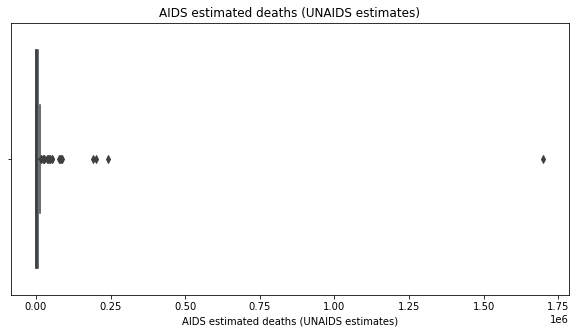

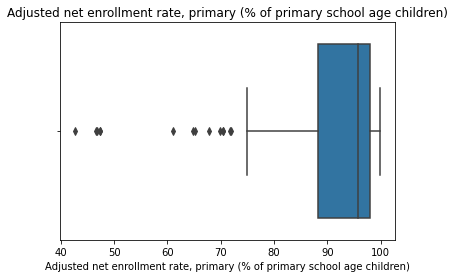

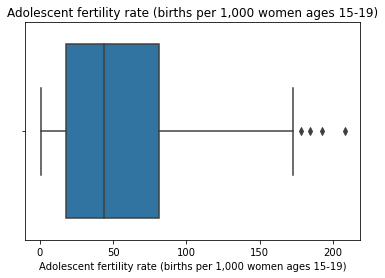

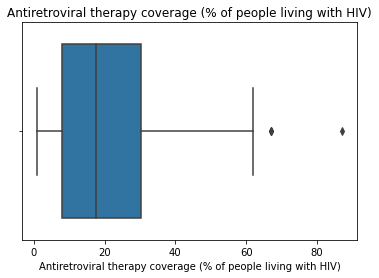

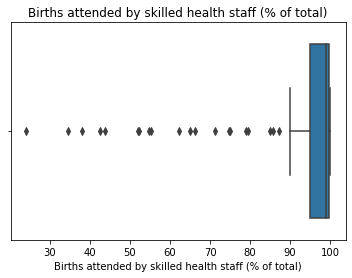

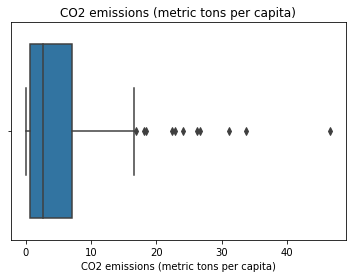

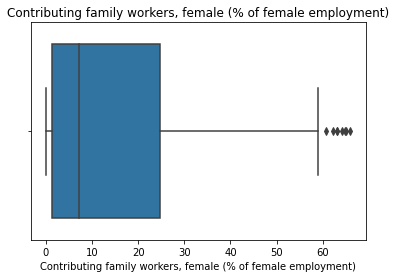

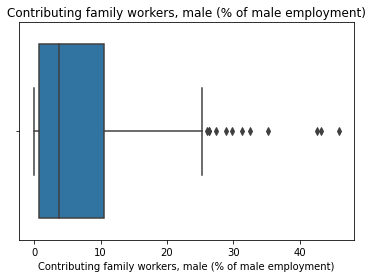

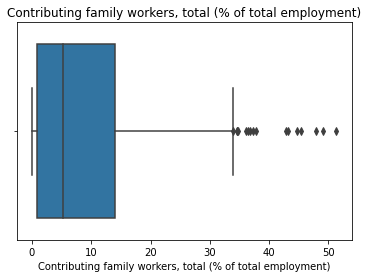

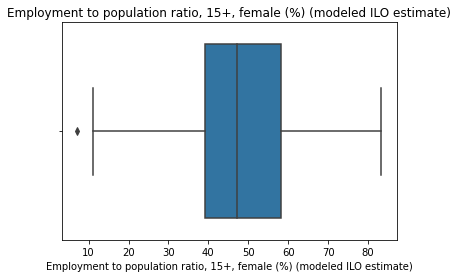

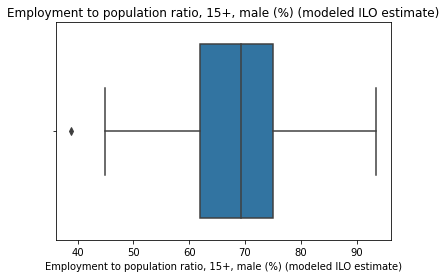

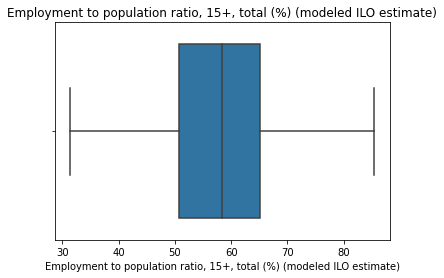

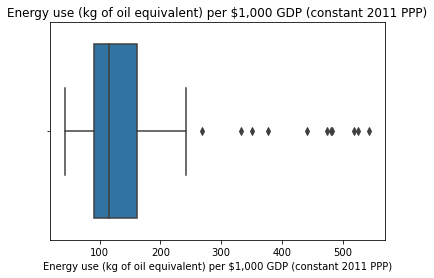

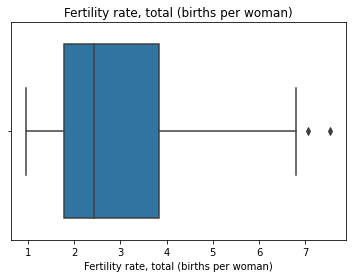

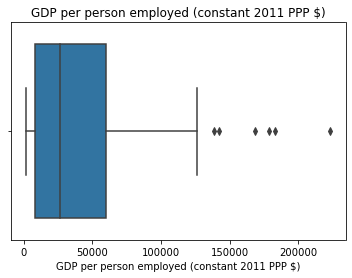

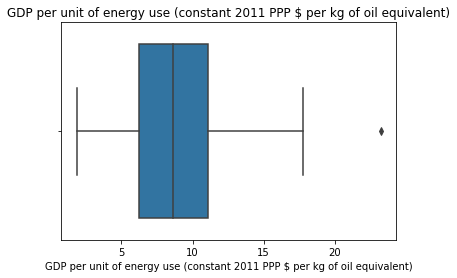

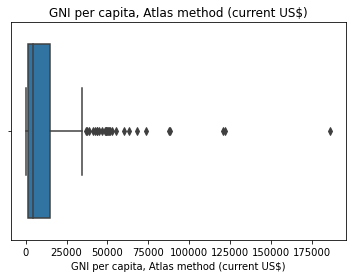

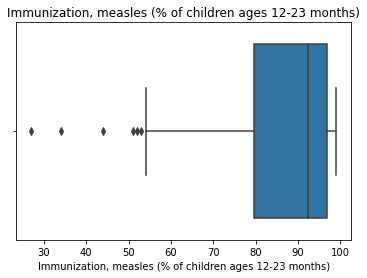

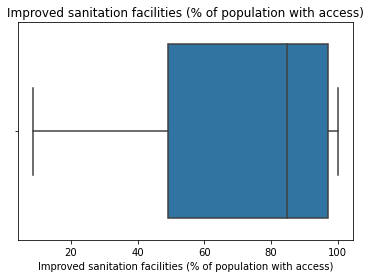

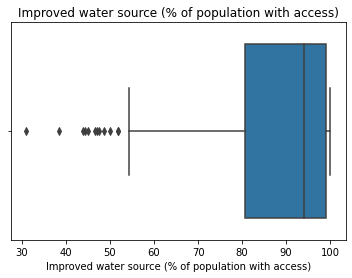

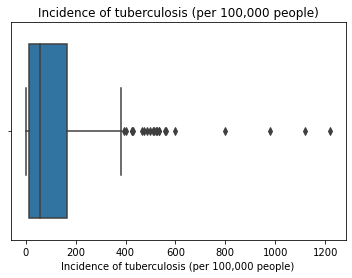

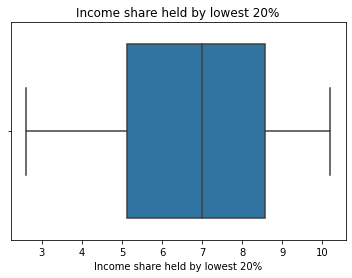

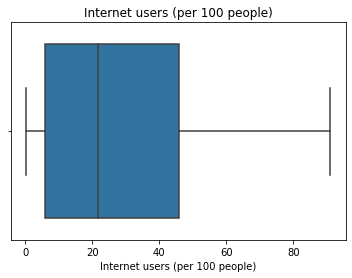

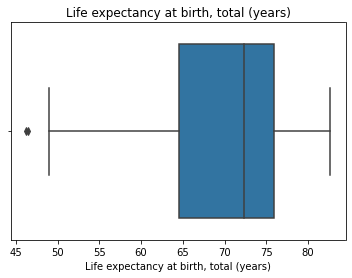

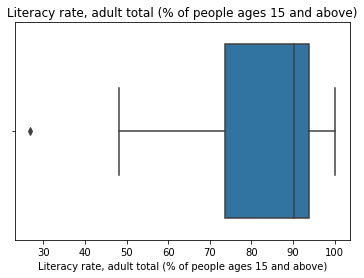

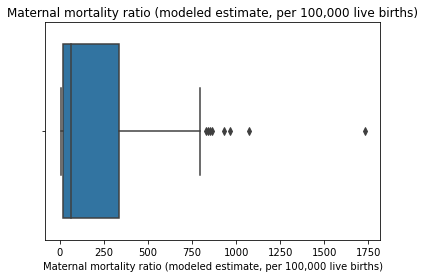

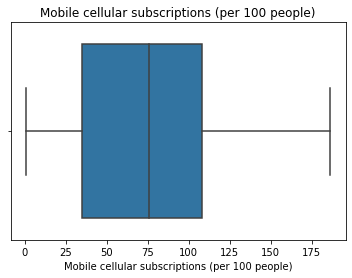

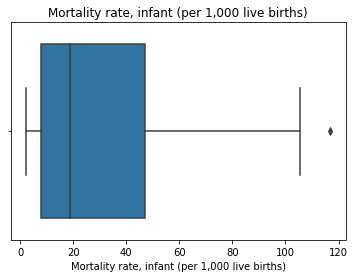

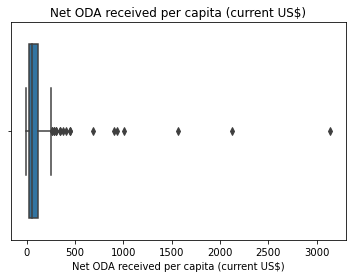

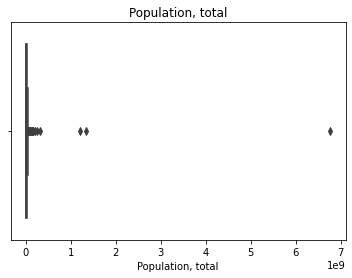

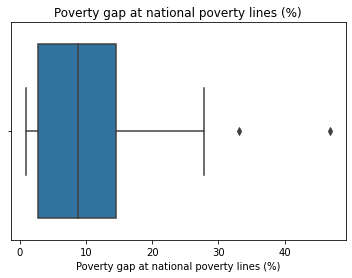

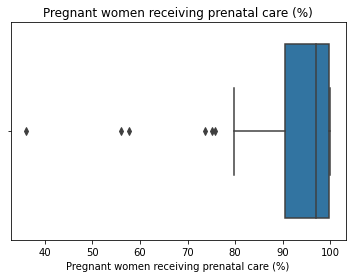

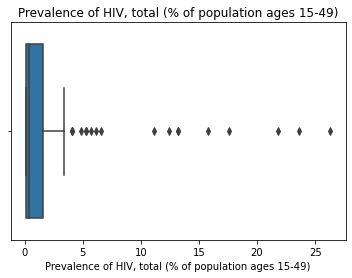

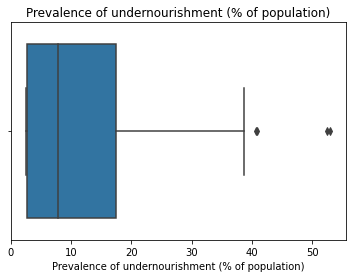

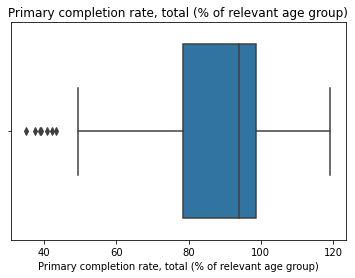

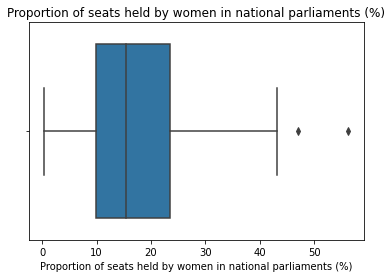

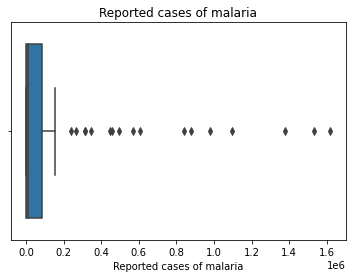

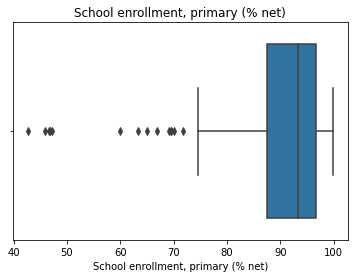

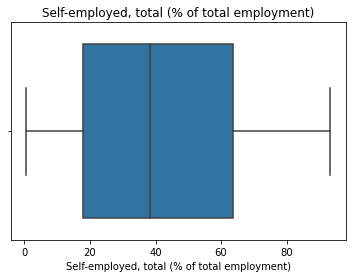

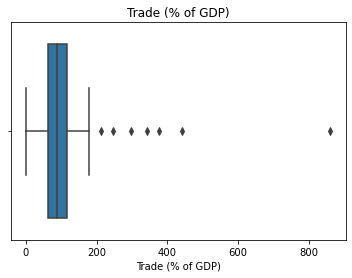

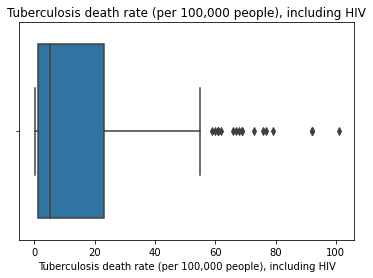

In [42]:
# setting figure size
fig, ax = plt.subplots(figsize = (10, 5))

# developing boxplots for every chosen criteria
for criteria in new_data_column:
    sns.boxplot(x      = criteria,
                hue    = None,     
                orient = 'h',       # horizontal 
                data   = new_data)  


    # formatting and displaying the plot
    plt.title(label = criteria)
    plt.xlabel(xlabel= criteria)
    # Save all generated graphs to the designated file
    #plt.savefig(f'./graph/{criteria}.png')  
    plt.show()

In [ ]:
new_data.loc[:,['Income share held by lowest 20%']].describe()

In [ ]:
new_data.loc[:,['Country Name']][new_data.loc[:,'Income share held by lowest 20%']>6.917972]\
                              [new_data.loc[:,'Cool Name']=="Mirage"]

In [ ]:
new_data.loc[:,['Literacy rate, adult total (% of people ages 15 and above)']].describe()

In [ ]:
new_data.loc[:,['Country Name','Literacy rate, adult total (% of people ages 15 and above)']][new_data.loc[:,'Literacy rate, adult total (% of people ages 15 and above)']>88.946824]\
                              [new_data.loc[:,'Cool Name']=="Mirage"]

In [ ]:
new_data.loc[:,['Net ODA received per capita (current US$)']].describe()

In [ ]:
new_data.loc[:,['Country Name','Net ODA received per capita (current US$)']][new_data.loc[:,'Net ODA received per capita (current US$)']>118.235023]\
                              [new_data.loc[:,'Cool Name']=="Mirage"]

<h4>2. World criteria arrowing based on missing values</h4>
<p>
    
- Then, we starting to narrow down the world based on number of missing value per criteria

</p>


In [76]:
new_data_column_new = new_data.columns
new_wrd_considered_criteria = []
run = 0 
for col in data:
    if data[col].isnull().sum(axis = 0) <= 30:
        print(col)
        new_wrd_considered_criteria.append(new_data[col])
        print(new_data[col].isnull().sum(axis = 0))
        run += 1
print(new_wrd_considered_criteria)

Country Code Total
0
Country Name
0
Hult Region
0
Cool Name
0
Adolescent fertility rate (births per 1,000 women ages 15-19)
0
CO2 emissions (metric tons per capita)
0
Contributing family workers, female (% of female employment)
0
Contributing family workers, male (% of male employment)
0
Contributing family workers, total (% of total employment)
0
Employment to population ratio, 15+, female (%) (modeled ILO estimate)
0
Employment to population ratio, 15+, male (%) (modeled ILO estimate)
0
Employment to population ratio, 15+, total (%) (modeled ILO estimate)
0
Fertility rate, total (births per woman)
0
GNI per capita, Atlas method (current US$)
0
Immunization, measles (% of children ages 12-23 months)
0
Improved sanitation facilities (% of population with access)
0
Improved water source (% of population with access)
0
Incidence of tuberculosis (per 100,000 people)
0
Internet users (per 100 people)
0
Life expectancy at birth, total (years)
0
Mobile cellular subscriptions (per 100 people)

<h4>3. Region criteria narrowing based missing values</h4>
<p>
    
- According to the previous result, we have chosen some of the criteria than have less than or equals to 2 missing values in the region countries. 
    
</p>

In [77]:
df_new_wrd_considered_criteria = pd.DataFrame(new_wrd_considered_criteria)
df_new_wrd_considered_criteria = df_new_wrd_considered_criteria.T
new_region_decision_lst = df_new_wrd_considered_criteria.loc[:,:][df_new_wrd_considered_criteria.loc[:,"Hult Region"] == "Middle East & Russia"]
new_region_decision_lst

,Country Code Total,Country Name,Hult Region,Cool Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)",CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)",...,Improved water source (% of population with access),"Incidence of tuberculosis (per 100,000 people)",Internet users (per 100 people),"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)","Population, total","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
1,AFG,Afghanistan,Middle East & Russia,Mirage,111.141,0.154101,64.243,23.489,28.861,12.922,...,44.4,189,1.84,60.243,28.9401,70.6,27294031,72.32,73.0655,40
7,ARM,Armenia,Middle East & Russia,Mirage,27.671,1.91154,34.188,16.972,24.757,38.234,...,97.3,71,6.21,72.946,49.5836,17.8,2908220,50.202,55.7029,8.8
12,AZE,Azerbaijan,Middle East & Russia,Mirage,40.5808,4.05138,31.112,26.056,28.634,59.191,...,81,108,17.08,70.238,74.2243,36.8,8763400,69.728,89.2429,4.7
18,BGR,Bulgaria,Middle East & Russia,Mirage,43.9828,6.77209,1.518,0.588,1.014,46.028,...,99.6,49,39.67,72.9634,138.862,9.6,7492561,12.472,124.845,3.2
22,BLR,Belarus,Middle East & Russia,Mirage,21.9116,6.62316,0.175,0.154,0.164,56.192,...,99.6,72,23,70.4561,85.4919,5,9527985,3.689,129.599,10
68,GEO,Georgia,Middle East & Russia,Mirage,50.9344,1.28209,37.867,19.66,28.069,45.615,...,95.3,140,10.01,72.673,63.4737,17.2,4030000,64.245,87.0235,5.1
90,IRN,"Iran, Islamic Rep.",Middle East & Russia,Mirage,30.5856,7.43467,29.685,4.81,8.892,12.88,...,95.5,16,12.02,73.044,59.029,18.6,72845542,46.847,48.2294,0.73
121,MDA,Moldova,Middle East & Russia,Mirage,26.8616,1.33836,2.956,2.273,2.61,39.885,...,86.9,125,23.39,68.671,58.9432,15.1,3570108,28.44,134.423,15
149,PAK,Pakistan,Middle East & Russia,Mirage,41.4576,0.97205,64.975,19.685,28.284,19.659,...,90.1,276,7,64.565,53.7871,75.6,163644603,63.784,35.5942,28
163,ROU,Romania,Middle East & Russia,Mirage,38.5224,4.69207,18.946,5.98,11.803,43.993,...,94.6,120,32.42,72.5659,117.525,11,20537875,32.595,65.4163,7.9


In [46]:
new_data_column_new = new_data.columns
new_reg_considered_criteria = []
run = 0 
for col in new_region_decision_lst:
    if new_region_decision_lst[col].isnull().sum(axis = 0) <= 30:
        new_reg_considered_criteria.append(new_region_decision_lst[col])
        run += 1
df_new_reg_considered_criteria = pd.DataFrame(new_reg_considered_criteria)
df_new_reg_considered_criteria = df_new_reg_considered_criteria.T
#print(df_new_reg_considered_criteria)
df_new_reg_considered_criteria.columns

Index(['Country Code Total', 'Country Name', 'Hult Region', 'Cool Name',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'CO2 emissions (metric tons per capita)',
       'Contributing family workers, female (% of female employment)',
       'Contributing family workers, male (% of male employment)',
       'Contributing family workers, total (% of total employment)',
       'Employment to population ratio, 15+, female (%) (modeled ILO estimate)',
       'Employment to population ratio, 15+, male (%) (modeled ILO estimate)',
       'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',
       'Fertility rate, total (births per woman)',
       'GNI per capita, Atlas method (current US$)',
       'Immunization, measles (% of children ages 12-23 months)',
       'Improved sanitation facilities (% of population with access)',
       'Improved water source (% of population with access)',
       'Incidence of tuberculosis (per 100,000 people)',

In [78]:
decision_lst_new = df_region_decision_lst.loc[['Adolescent fertility rate (births per 1,000 women ages 15-19)',\
                                       'CO2 emissions (metric tons per capita)',\
                                       'Contributing family workers, female (% of female employment)',\
                                       'Contributing family workers, male (% of male employment)',\
                                       'Contributing family workers, total (% of total employment)',\
                                       'Employment to population ratio, 15+, female (%) (modeled ILO estimate)',\
                                       'Employment to population ratio, 15+, male (%) (modeled ILO estimate)',\
                                       'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',\
                                       'Fertility rate, total (births per woman)',\
                                       'GNI per capita, Atlas method (current US$)',\
                                       'Immunization, measles (% of children ages 12-23 months)',\
                                       'Improved sanitation facilities (% of population with access)',\
                                       'Improved water source (% of population with access)',\
                                       'Incidence of tuberculosis (per 100,000 people)',\
                                       'Internet users (per 100 people)',\
                                       'Life expectancy at birth, total (years)',\
                                       'Mobile cellular subscriptions (per 100 people)',\
                                       'Mortality rate, infant (per 1,000 live births)',\
                                       'Population, total',\
                                       'Self-employed, total (% of total employment)',\
                                       'Trade (% of GDP)',\
                                       'Tuberculosis death rate (per 100,000 people), including HIV'],:]
decision_lst_new

,country,index,wrd_medi,mir_medi,%
"Adolescent fertility rate (births per 1,000 women ages 15-19)",middle_east_n_russia,low,44.12,30.25,0.46
CO2 emissions (metric tons per capita),World,low,2.65,4.62,-0.43
"Contributing family workers, female (% of female employment)",middle_east_n_russia,lar,7.23,16.31,125.59
"Contributing family workers, male (% of male employment)",middle_east_n_russia,lar,3.72,5.58,50.00
"Contributing family workers, total (% of total employment)",middle_east_n_russia,lar,5.21,8.85,69.87
"Employment to population ratio, 15+, female (%) (modeled ILO estimate)",World,lar,47.20,45.67,-3.24
"Employment to population ratio, 15+, male (%) (modeled ILO estimate)",World,lar,69.20,62.84,-9.19
"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",World,lar,58.43,51.69,-11.54
"Fertility rate, total (births per woman)",World,lar,2.44,1.74,-28.69
"GNI per capita, Atlas method (current US$)",World,lar,4330.00,3410.00,-21.25


In [79]:
# see which criterias perform better
# see which criterias perform better
better_criterias = decision_lst_new.loc[:,:][decision_lst_new.iloc[:,0]=="middle_east_n_russia"]
better_criterias.iloc[:,1:].sort_values(by=['%'])

,index,wrd_medi,mir_medi,%
"Mortality rate, infant (per 1,000 live births)",low,18.70,17.50,0.07
"Adolescent fertility rate (births per 1,000 women ages 15-19)",low,44.12,30.25,0.46
Improved water source (% of population with access),lar,94.10,95.30,1.28
Improved sanitation facilities (% of population with access),lar,84.80,85.90,1.30
"Immunization, measles (% of children ages 12-23 months)",lar,92.50,96.00,3.78
"Contributing family workers, male (% of male employment)",lar,3.72,5.58,50.00
"Contributing family workers, total (% of total employment)",lar,5.21,8.85,69.87
"Contributing family workers, female (% of female employment)",lar,7.23,16.31,125.59


<body>
    <h3>Step 6 - Country choosing</h3>
    <p>After looking into the data and the criteria, we decided to choose the best-representing country of our region by analyzing different aspects. First, we decided to exclude all the countries that had a population census older than 2010 because they were not representative of the actual situation in those countries. The goal was to find the five best suitable criteria to describe the region and find which country is the best performer when it comes to those five criteria.</p>
    <h4>Best 5 criteria in the region</h4>
    <p>
        
- Contributing family workers, female (% of female employment)

- Contributing family workers, male (% of male employment)

- Improved sanitation facilities (% of population with access)

- Improved water source (% of population with access)

- Adolescent fertility rate (births per 1,000 women ages 15-19)
        
We decided to work with those five criteria because they were the most relevant when it comes to justifying good reasons to invest in Turkmenistan.</p>
</body>

In [86]:
## Subsetting the dataset to only display the selected criterias for all the countries in Middle East & Russia Region ##

new_countries_under_middle_east_n_russia_fill_missno = new_data.loc[ : , : ][new_data.loc[ : , "Hult Region"] == "Middle East & Russia"]


choosen_criterias = new_countries_under_middle_east_n_russia_fill_missno.loc[:,["Contributing family workers, female (% of female employment)",\
                                   "Contributing family workers, male (% of male employment)",\
                                   "Improved sanitation facilities (% of population with access)",\
                                   "Improved water source (% of population with access)",\
                                   'Adolescent fertility rate (births per 1,000 women ages 15-19)']]

# renaming columns
choosen_criterias.columns = ['Contributing family workers, female (% of female employment)',\
                                "Contributing family workers, male (% of male employment)",\
                                "Improved sanitation facilities (% of population with access)",\
                                "Improved water source (% of population with access)",\
                                'Adolescent fertility rate (births per 1,000 women ages 15-19)']

# rename observation index to the country name
choosen_criterias.rename(index= country_name, inplace = True)

# Print choosen criterias 
#choosen_criterias
choosen_criterias.describe()

,"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)",Improved sanitation facilities (% of population with access),Improved water source (% of population with access),"Adolescent fertility rate (births per 1,000 women ages 15-19)"
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,22.238071,9.378000,79.185714,89.907143,38.091700
std,22.478515,9.561588,19.166552,14.130952,23.026276
min,0.113000,0.154000,28.000000,44.400000,17.989000
25%,1.877500,1.009250,75.200000,88.000000,27.063950
50%,16.307000,5.578500,85.350000,94.950000,30.252500
75%,33.419000,18.988000,90.250000,96.700000,41.238400
max,64.974998,26.056000,100.000000,99.600000,111.141400


   <h4>Best performing country in the region</h4>
    <p>After looking through the best 5 performing criteria within the region, we proceed to chose a best representing country for this region based on top 5 performing countries in each criteria. After that, we narrowed down the country to only four of them.</p>
    <p>Georgia, Georgia, Pakistan, and Uzbekistan are the four countries that have left, Although Georgia is not the best performer of the region, the country did not scored bottom at the list as well. Thus, we believe Georgia could best represent the Middle East and Russia region.</p>
    <p>Georgia is currently located in the between Europe and Asia. The country doesn't have any major fossil fuel reserve, even though they are closed to the basins. However,the country does serve as transit country as Georgia has multiple major oil and gas pipelines lay across the country. Furthermore, the country's population is made up for 48.7% male and 51.3% female.</p> 

In [110]:
country_choosen = choosen_criterias.loc[['Pakistan','Armenia','Uzbekistan','Georgia']]
country_choosen

,"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)",Improved sanitation facilities (% of population with access),Improved water source (% of population with access),"Adolescent fertility rate (births per 1,000 women ages 15-19)"
Pakistan,64.974998,19.684999,51.2,90.1,41.4576
Armenia,34.188000,16.972000,89.5,97.3,27.6710
Uzbekistan,11.593000,5.941000,100.0,87.3,17.9890
Georgia,37.867001,19.660000,90.5,95.3,50.9344


<h2>Result</h2>
<hr style = height:1.5px; color:black ; background-color:black/>
<body>
    <p>Contributing family workers, female (% of female employment), Contributing family workers, male (% of male employment), Improved sanitation facilities (% of population with access),  Improved water source (% of population with access), Adolescent fertility rate (births per 1,000 women ages 15-19) are the top five features that we choose that best exemplify our region.</p>
    <h4>&emsp;&emsp;&emsp;Contributing family workers, female (% of female employment)</h4>
    <p>&emsp;&emsp;&emsp;Compare to the other three countries, Georgia has scored number 2 in this criteria. While comparing to the region, Georgia is still remain in the top &emsp;&emsp;&emsp;three countries. This means the Georgia's female labor force are more willingly to work compare to other countries in the region.</p>
    <h4>&emsp;&emsp;&emsp;Contributing family workers, male (% of male employment)</h4>    
    <p>&emsp;&emsp;&emsp;This criteria could confirm the female proportion in Georgia is indeed higher than the male proportion. However, this is a 18.207% difference between &emsp;&emsp;&emsp;Georgia's female and male working labor force. This could suggest there is large proportion of the male in this country is either elderly or youngster or &emsp;&emsp;&emsp;both.</p>
    <h4>&emsp;&emsp;&emsp;Improved sanitation facilities (% of population with access)</h4>    
    <p>&emsp;&emsp;&emsp;Sanitation is critical for survival as good sanitation could prevent diseases.</p>
    <h4>&emsp;&emsp;&emsp;Improved water source (% of population with access)</h4> 
    <p>&emsp;&emsp;&emsp;Along with sanitation, water is another critical element for surviving. Having a higher percentage in this criteria means the majority population in this &emsp;&emsp;&emsp;nation could access to clear water.</p>
    <h4>&emsp;&emsp;&emsp;Adolescent fertility rate (births per 1,000 women ages 15-19)</h4>     
    <p>&emsp;&emsp;&emsp;Although Georgia has scored the highest rank in the criteria, it also reflected the potential molest problem in this region is serious.</p>
</body>


<h2>Outliers strategy</h2>
<p>
When it comes to identifying the outliers, we did multiple Box plots to see those outliers, and all of those were based on the region's values that we had.</p>

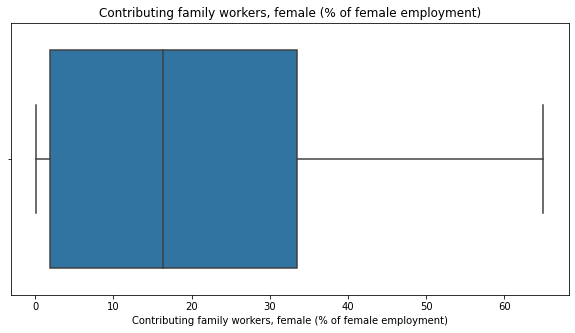

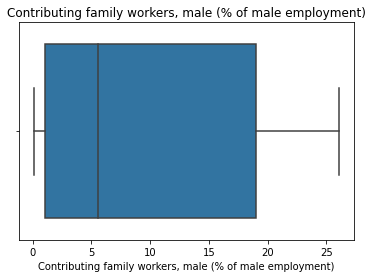

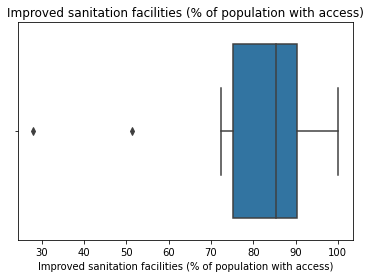

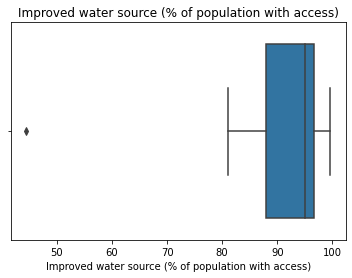

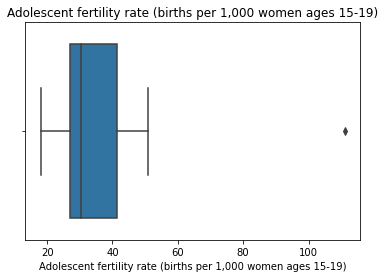

In [82]:
# setting figure size
fig, ax = plt.subplots(figsize = (10, 5))

# developing boxplots for every chosen criteria
for criteria in choosen_criterias.columns:
    sns.boxplot(x      = criteria,
                hue    = None,     
                orient = 'h',       # horizontal 
                data   = choosen_criterias)  


    # formatting and displaying the plot
    plt.title(label = criteria)
    plt.xlabel(xlabel= criteria)  
    plt.show()

<body>
<h3>Correlation between all chosen criteria in the region</h3>
<p>We have matching the contributing family workers criteria with adolescent fertility rate, while we are also matching th improved sanitation facilities and improved water source with the adolescent fertility rate as well.<br>
This two matches is an attempt to investigate is a better environmental elements, and a full time working parents will have effect on the adolescent's behavior.<br>
Both of the correlation of between the Adolescent fertility rate and the contributing family female workers and contributing family male workers indicates full time working parents in that region does an impact toward the adolescent.<br>
Yet, the improved environmental elements has a perfect negative correlation with the adolescent fertility rate. Being negatively correlated means improved environment the better the environment, the higher the adolescent fertility rate is.<br>
However, there are much more factors to determine the reason of such a high adolescent fertility rate, and therefore, this correlation might just be a causation between all this variables. 
</p>
</body>

In [119]:
# Correlation between the chosen criterias
choosen_criterias.corr(method = 'pearson').style.background_gradient(cmap='coolwarm')

,"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)",Improved sanitation facilities (% of population with access),Improved water source (% of population with access),"Adolescent fertility rate (births per 1,000 women ages 15-19)"
"Contributing family workers, female (% of female employment)",1.000000,0.861714,-0.687836,-0.590613,0.659070
"Contributing family workers, male (% of male employment)",0.861714,1.000000,-0.504483,-0.569808,0.580819
Improved sanitation facilities (% of population with access),-0.687836,-0.504483,1.000000,0.785464,-0.798944
Improved water source (% of population with access),-0.590613,-0.569808,0.785464,1.000000,-0.847648
"Adolescent fertility rate (births per 1,000 women ages 15-19)",0.659070,0.580819,-0.798944,-0.847648,1.000000


<h2>Conclusion</h2>
<p>In conclusion, Georgia is a country where people and companies should think of investing if they are looking to enter this part of the world. Indeed, until approximately two years there was no or very little foreign direct investment in his country due to the tight hold of the autocratic government. Luckily for the world, since late 2019 the government has started looking into different possibilities to partners with foreign companies and countries in order to increase the growth of the country that has been lacking for some time now.</p>

<body>&nbsp; &emsp;
    <h2>Reference</h2>
    <p>Middle East Facts | Idaho State University. (n.d.). Idaho State University. Retrieved November 6,<br>&emsp;2020, from <a href= "https://teachmideast.org/articles/what-is-the-middle-east/">https://teachmideast.org/articles/what-is-the-middle-east/</a></p>
    <p>What is the Middle East? (2015, September 25). TeachMideast.<br>
        &emsp;<a href= "https://www.isu.edu/history/student-opportunities/class-projects/middle-east-facts/">https://www.isu.edu/history/student-opportunities/class-projects/middle-east-facts/</a></p>
    <p>Rumer, W. A. E. S. (2019, October 24). A Brief Guide to Russiaâs Return to the Middle East.
    <br>&emsp;Carnegie Endowment for International Peace.<br>
    &emsp;<a href = "https://carnegieendowment.org/2019/10/24/brief-guide-to-russia-s-return-to-middle-east-pub-80134">https://carnegieendowment.org/2019/10/24/brief-guide-to-russia-s-return-to-middle-east-pub-80134</a>
    </p>
</body>